## Most optimal skills to learn

<h3 style="margin-top: 5px; margin-bottom: 6px;">Question to Answer</h3>
<p style="font-size:15px; margin-top: 0; margin-bottom: 16px;">

<b>What are the most optimal skill-sets to target for someone entering the data job market?(High Demand AND High Paying)</b>
</p>

<h4>Methodology — Skill Demand vs. Salary</h4>

<ol>
  <li>Filter data for the selected role (e.g., <code>Data Analyst</code>).</li>
  <li>Group by skill to find job count and mean salary.</li>
  <li>Select top 10 skills by job count.</li>
  <li>Plot a scatter of job count vs. mean salary with skill labels.</li>
</ol>


### Importing Libraries and Dataset
<hr>


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# importing cleaned dataset
df = pd.read_csv('data_cleaned_jobs.csv')

# data parsing
df['job_posted_date'] = pd.to_datetime(df.job_posted_date).dt.date
df['job_skills'] = df['job_skills'].apply(lambda skills: ast.literal_eval(skills) if pd.notna(skills) else skills)
df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_year_avg,company_name,job_skills,original_salary_year_avg
0,Data Analyst,Sr Data Analyst,"Tampa, FL",via Trabajo.org,Full-time,False,2023-01-01,False,False,United States,100000.0,"TWO95 International, Inc","[sql, sql server, excel, ssrs, power bi, power...",NaN
1,Data Analyst,Product Managers Data analyst,"Boston, MA",via LinkedIn,Full-time,False,2023-01-01,False,False,United States,90000.0,Diverse Lynx,[sql],NaN
2,Data Scientist,AI/ML Radar Research Data Scientist Jobs,"San Diego, CA",via Clearance Jobs,Full-time,False,2023-01-01,False,False,United States,135000.0,Leidos,"[python, matlab]",NaN
3,Data Analyst,Data Management Analyst,"Dallas, TX",via Indeed,Full-time,False,2023-01-01,False,False,United States,92500.0,KORE1 Technologies,"[sql, excel, tableau, terminal]",NaN
4,Data Scientist,Data Science Consultant,"San Francisco, CA",via Mendeley,Full-time,False,2023-01-01,False,False,United States,157500.0,Resume Library,NaN,NaN


### Skills count and mean salary
<hr>

In [47]:
# selecting job role
job_role = 'Data Analyst'
df_filtered = df[df.job_title_short == job_role]

# exploding the skills list
df_exploded = df_filtered[df_filtered.job_skills.notna()].explode('job_skills', ignore_index=True)

df_scatter_data = (df_exploded.groupby('job_skills')
                  .agg({
                     'job_title':'count',
                     'salary_year_avg':'mean'
                  }).rename(columns={'salary_year_avg': 'mean_salary', 'job_title': 'job_count'})
                  .sort_values(by='job_count', ascending=False)
                  .head(10)
)
      
# Determine likelihood of job skill required in job posting
total_job_post = df_filtered['job_title_short'].count()
df_scatter_data['%_share'] = 100*(df_scatter_data['job_count']/total_job_post)

df_scatter_data

,job_count,mean_salary,%_share
job_skills,,,
sql,29029,92543.978317,50.767751
excel,23526,90959.494454,41.143757
tableau,16480,92996.190152,28.821266
python,15831,93601.259891,27.686254
sas,11552,91187.078360,20.202868
r,10380,92785.417267,18.153200
power bi,10071,91377.376037,17.612802
word,6579,90436.080992,11.505771
powerpoint,6100,91065.312778,10.668066


### Plotting the graph
<hr>

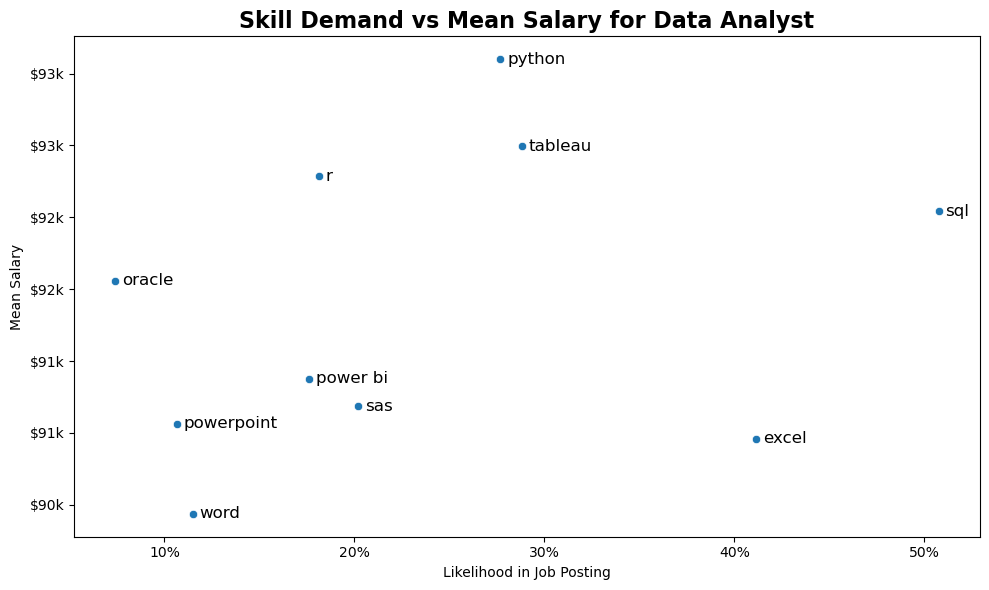

In [48]:
# plotting scatter plot
sns.scatterplot(data=df_scatter_data, x='%_share', y='mean_salary')

for i, skill in enumerate(df_scatter_data.index):
   xpoint = df_scatter_data.iloc[i,2]
   ypoint = df_scatter_data.iloc[i,1]
   plt.text(xpoint+0.35, ypoint, skill, fontsize=12, ha='left', va='center')

plt.gcf().set_size_inches(10, 6)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{round(x)}%'))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))
plt.xlabel('Likelihood in Job Posting')
plt.ylabel('Mean Salary')
plt.title(f"Skill Demand vs Mean Salary for {job_role}", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()